# Project:

In this project, we are going to analyze 12 months of data of sales. We will do how to clean, manage and analyze the dataset to find some meaningful information.

we explore 5 high level business questions related to our data:

What was the best month for sales?

How much was earned that month?

What city sold the most product?

What time should we display advertisemens to maximize the likelihood of customer’s buying product?

What products are most often sold together?

What product sold the most? Why do you think it sold the most?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
import os

In [2]:
# path of sales data

path=r"C:\Users\sachi\OneDrive\Desktop\SalesData"

In [3]:
# getting of file name

file_names=os.listdir(path)
file_names

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

# creating single dataframe of complete year sale

In [5]:
edf=pd.DataFrame()
for file in file_names:
    df=pd.read_csv(fr'{path}\{file}')
    edf=pd.concat([edf,df])
edf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# checking and removing null values

In [6]:
edf.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
edf=edf.dropna()
edf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# data information

In [8]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


# converting data into right data type

In [10]:
edf['temp']=edf['Order ID'].astype(str).str.isdigit()
edf=edf.loc[edf['temp']==True]

edf['Order ID']=edf['Order ID'].astype(np.int64)
edf['Quantity Ordered']=edf['Quantity Ordered'].astype(np.int64)
edf['Price Each']=edf['Price Each'].astype(float)
edf['Order Date']=pd.to_datetime(edf['Order Date'])

edf=edf.drop(columns='temp')


edf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


# What was the best month for sales? How much was earned that month?

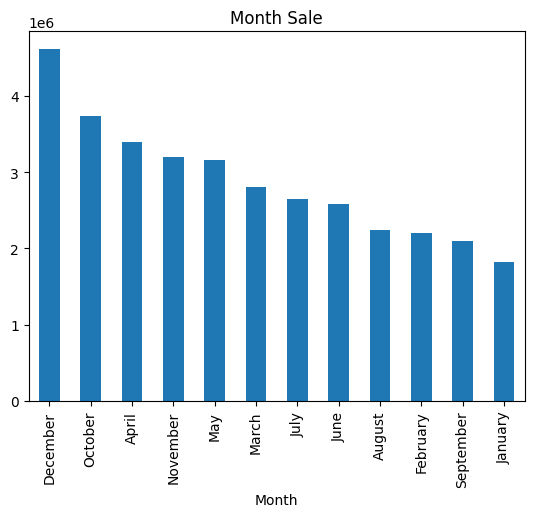

In [12]:
edf['Sales Amount']=edf['Quantity Ordered']*edf['Price Each']
edf['Month']=edf['Order Date'].dt.month_name()
gdf=edf.groupby('Month')['Sales Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Month Sale')
plt.show()

In [13]:
gdf=edf.groupby('Month')['Sales Amount'].sum().sort_values(ascending=False)
gdf

Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1822256.73
Name: Sales Amount, dtype: float64

# Best Month For Sales : December
# Total Sale Value In December : 4613443.34

# What city sold the most product?

In [14]:
# city

edf['City']=edf['Purchase Address'].str.split(',',expand=True)[1]
edf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,September,Los Angeles
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,September,San Francisco
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,September,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,September,San Francisco


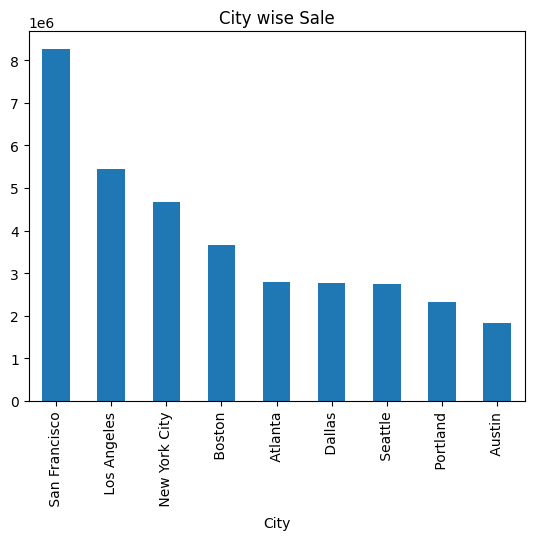

In [15]:
edf.groupby('City')['Sales Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('City wise Sale')
plt.show()

# City Sold Most Product : San Francisco

# What time should we display advertisements to maximize the likelihood of customer’s buying product?

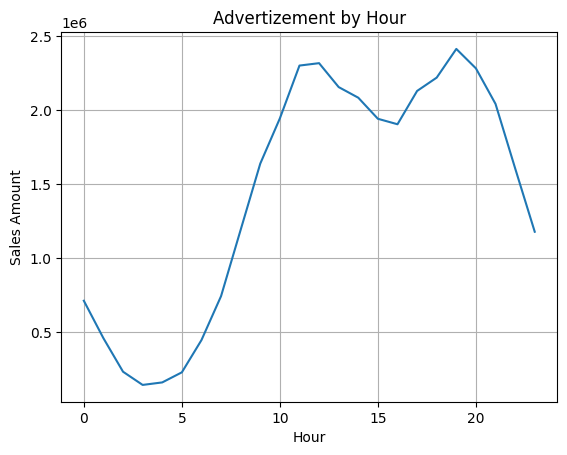

In [16]:
edf['Hour']=edf['Order Date'].dt.hour
hdf=edf.groupby('Hour')['Sales Amount'].sum().sort_values(ascending=False).reset_index()
sns.lineplot(x='Hour',y='Sales Amount',data=hdf)
plt.grid()
plt.title('Advertizement by Hour')
plt.show()

# What Products are most often sold together ?

In [17]:
ddf=edf.loc[edf['Order ID'].duplicated(keep=False)]
ddf['Grouped']=ddf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
ddf

C:\Users\sachi\AppData\Local\Temp\ipykernel_1816\3017265852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Grouped']=ddf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Month,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,April,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,April,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,September,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,September,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,September,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,September,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [18]:
count=Counter()
row_list=[]
for row in ddf['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
print(count.most_common(10)) 

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 271), (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 193), (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 146), (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 109), (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 101), (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 86), (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 75), (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 50), (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'), 20), (('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'), 17)]


# What product sold the most? Why do you think it sold the most?

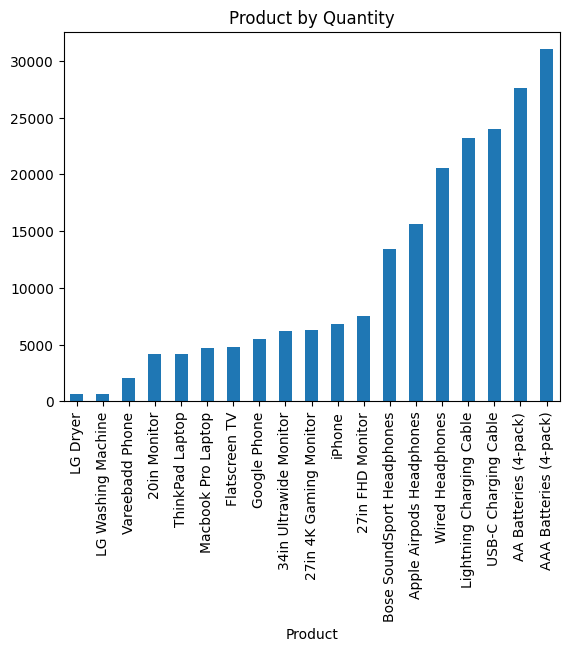

In [19]:
most_sold_product=edf.groupby('Product')['Quantity Ordered'].sum().sort_values().plot(kind='bar')
plt.title('Product by Quantity')
plt.show()